In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#teste['Instantaneous fuel consumption.2'].loc[(teste['Instantaneous fuel consumption.2']<1)
 #                                             & (teste['Vehicle Speed Sensor.2']==0)]

In [3]:
directory = os.path.join('csv/')
i=0
counter=0

mapper = {'Vehicle Voltage Level (usually the input voltage at the diagnostic connector).1':'Voltage',\
          'Ambient Air Temperature.2':'Temp_C', 'Engine RPM.1':'RPM','Instantaneous fuel consumption.2':'Fuel Flow',\
         'Vehicle Speed Sensor.2':'Speed','Ignition Timing Advance for #1 Cylinder.1':'Ignition_TA','Fuel flow calculated based on a MAF value (estimated or actual).2':'MAF',\
         'Estimated mass air flow - method A.2':'MAF2','Currently engaged gear.1':'Gear',\
          'Lateral Acceleration.1':'L_acc','Forward Acceleration.1':'F_acc','GPS Latitude.1':'Latitude',\
          'GPS Longitude.1':'Longitude','GPS Altitude.2':'Altitude','Calculated engine torque.1':'Torque',\
          'Calculated engine power.2':'Power','Frame Time (delta)':'Delta_time','Frame Time (ms)':'Total_time'}

for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            namecsv = file[:8]
            df1 = pd.read_csv('csv/'+str(namecsv)+'.csv', skiprows=1, low_memory=False, encoding='utf-8')
            try:
                df1['Currently engaged gear.1']
                df1.rename(mapper, inplace=True, axis=1)            
                df2 = df1.loc[:,['Voltage','Temp_C','RPM','Fuel Flow','Gear','Speed','MAF','MAF2','Ignition_TA',
                                 'L_acc','F_acc','Latitude','Longitude','Altitude','Torque','Power','Total_time',
                                 'Delta_time']]
                df2['Date'] = (str(namecsv)) #pd.to_datetime(str(namecsv), format='%Y-%m-%d')
                df2.dropna(axis=0, how='any', inplace=True)
                print('{}° Arquivo | Data: {} | {} Linhas' .format((counter+1), namecsv, len(df2)))
                if i==0:
                    df = df2.copy()
                    i = 1
                    counter=1
                    del(df2)
                else:
                    df = df.append(df2, ignore_index=True)
                    counter +=1
                    del(df2)
            except:
                print(str(namecsv)+' Não possui registro de marchas')
print('Shape final: {}' .format(df.shape))
print('Foram concatenados {} arquivos CSV'.format(counter))


                

            
          

20190328 Não possui registro de marchas
20190329 Não possui registro de marchas
1° Arquivo | Data: 20190504 | 0 Linhas
2° Arquivo | Data: 20190505 | 11505 Linhas
3° Arquivo | Data: 20190511 | 14607 Linhas
4° Arquivo | Data: 20190512 | 12660 Linhas
5° Arquivo | Data: 20190517 | 10820 Linhas
6° Arquivo | Data: 20190518 | 21041 Linhas
7° Arquivo | Data: 20190519 | 19107 Linhas
8° Arquivo | Data: 20190601 | 9795 Linhas
9° Arquivo | Data: 20190602 | 30361 Linhas
10° Arquivo | Data: 20190603 | 35306 Linhas
11° Arquivo | Data: 20190620 | 6183 Linhas
12° Arquivo | Data: 20190716 | 0 Linhas
13° Arquivo | Data: 20190717 | 0 Linhas
14° Arquivo | Data: 20190805 | 13232 Linhas
15° Arquivo | Data: 20190810 | 16738 Linhas
16° Arquivo | Data: 20191030 | 9313 Linhas
17° Arquivo | Data: 20191104 | 0 Linhas
18° Arquivo | Data: 20191110 | 10986 Linhas
19° Arquivo | Data: 20200302 | 9524 Linhas
20° Arquivo | Data: 20200303 | 6031 Linhas
21° Arquivo | Data: 20200304 | 328 Linhas
22° Arquivo | Data: 20200305

In [4]:
df.head()

Voltage  Temp_C     RPM  Fuel Flow  Gear  Speed    MAF   MAF2  Ignition_TA  \
0     13.0    31.0  3470.0        6.9   2.0   37.0  5.366  11.28         25.5   
1     13.0    31.0  3470.0        6.9   2.0   37.0  5.366  11.28         25.5   
2     13.0    31.0  3470.0        6.9   2.0   37.0  5.366  11.28         25.5   
3     13.0    31.0  3470.0        6.9   2.0   37.0  5.366  11.28         25.5   
4     13.0    31.0  3559.0        6.9   2.0   37.0  5.366  11.28         25.5   

   L_acc  F_acc  Latitude  Longitude  Altitude  Torque  Power  Total_time  \
0   0.11   0.17 -23.62966  -46.53442     741.0    29.0   19.0        1717   
1   0.11   0.17 -23.62966  -46.53442     741.0    29.0   19.0        2231   
2   0.11   0.17 -23.62961  -46.53451     741.0    29.0   19.0        2271   
3   0.09   0.18 -23.62961  -46.53451     741.0    29.0   19.0        2294   
4   0.07   0.13 -23.62961  -46.53451     741.0    29.0   19.0        2434   

   Delta_time      Date  
0         195  20190505  
1         514  20190505  
2          40  20190505  
3          23  20190505  
4         140  20190505

In [5]:
df['Gear']= pd.to_numeric(df['Gear'], downcast='integer')

In [6]:
df.dtypes

Voltage        float64
Temp_C         float64
RPM            float64
Fuel Flow      float64
Gear              int8
Speed          float64
MAF            float64
MAF2           float64
Ignition_TA    float64
L_acc          float64
F_acc          float64
Latitude       float64
Longitude      float64
Altitude       float64
Torque         float64
Power          float64
Total_time       int64
Delta_time       int64
Date            object
dtype: object

In [7]:
df.describe()


Voltage         Temp_C            RPM      Fuel Flow  \
count  445905.000000  445905.000000  445905.000000  445905.000000   
mean       12.942657      22.142634    2235.084982      19.189123   
std         0.178058       5.261039     635.167793      13.856862   
min        11.600000       9.000000     472.000000       0.200000   
25%        12.800000      19.000000    1798.000000       8.400000   
50%        13.000000      21.000000    2250.000000      15.500000   
75%        13.100000      25.000000    2619.000000      27.400000   
max        13.300000      41.000000    5434.000000      79.700000   

                Gear          Speed            MAF           MAF2  \
count  445905.000000  445905.000000  445905.000000  445905.000000   
mean        3.496947      49.556901       3.763665       7.912031   
std         1.517176      25.432202       2.966832       6.236633   
min         0.000000       0.000000       0.555000       1.170000   
25%         3.000000      32.000000       1.466000       3.080000   
50%         4.000000      46.000000       2.800000       5.890000   
75%         5.000000      72.000000       5.118000      10.760000   
max         5.000000     108.000000      22.102000      46.460000   

         Ignition_TA          L_acc          F_acc       Latitude  \
count  445905.000000  445905.000000  445905.000000  445905.000000   
mean       14.862109       0.007350       0.008926     -23.709592   
std        14.054647       0.085272       0.095738       0.157275   
min       -25.500000      -0.860000      -0.940000     -24.156870   
25%         3.500000      -0.030000      -0.040000     -23.719360   
50%        15.500000       0.000000       0.010000     -23.680530   
75%        26.000000       0.050000       0.060000     -23.631270   
max        47.000000       1.050000       0.770000     -23.421740   

           Longitude       Altitude         Torque          Power  \
count  445905.000000  445905.000000  445905.000000  445905.000000   
mean      -46.553497     573.050854      29.394754      12.940940   
std         0.047373     325.603690      18.491189      10.263466   
min       -46.744700      -5.000000       9.000000       2.000000   
25%       -46.568540     397.000000      13.000000       5.000000   
50%       -46.552030     750.000000      24.000000       9.000000   
75%       -46.529060     769.000000      40.000000      18.000000   
max       -46.451510     844.000000      88.000000      76.000000   

         Total_time    Delta_time  
count  4.459050e+05  4.459050e+05  
mean   1.255099e+06  9.012150e+01  
std    1.090409e+06  3.086733e+03  
min    0.000000e+00 -1.220011e+06  
25%    4.208070e+05  5.100000e+01  
50%    9.026200e+05  9.000000e+01  
75%    1.833372e+06  1.150000e+02  
max    4.698634e+06  1.220202e+06

Voltage


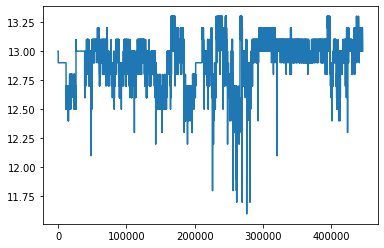

Temp_C


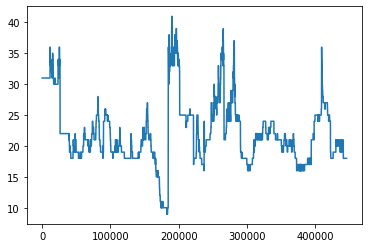

RPM


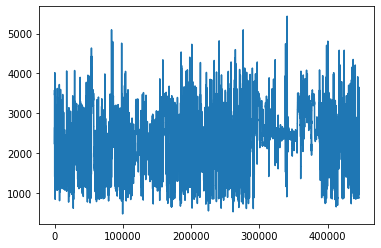

Fuel Flow


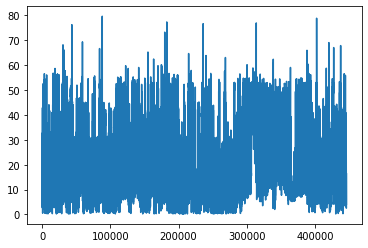

Gear


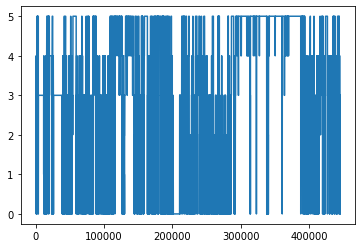

Speed


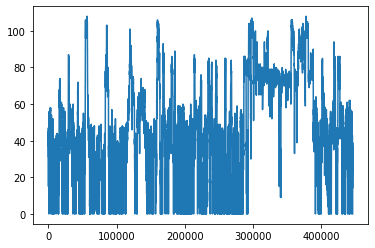

MAF


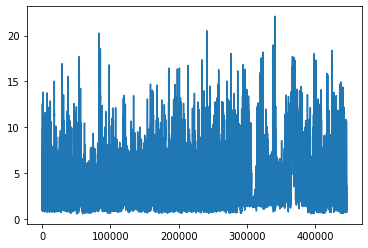

MAF2


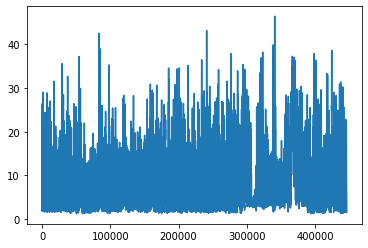

Ignition_TA


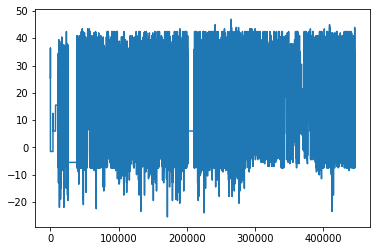

L_acc


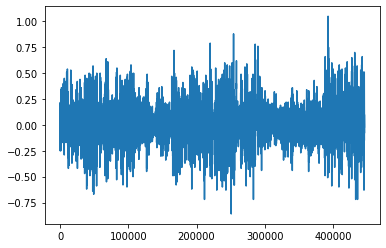

F_acc


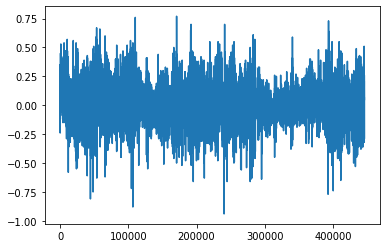

Latitude


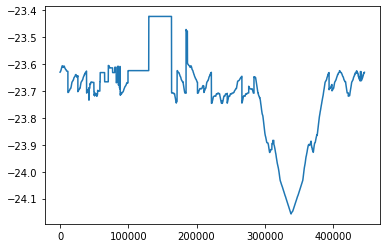

Longitude


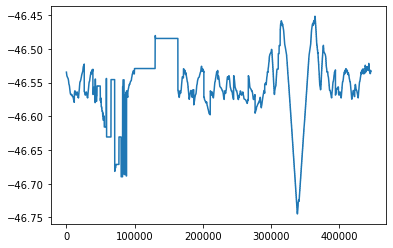

Altitude


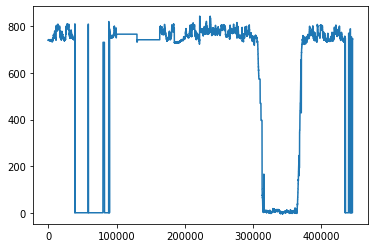

Torque


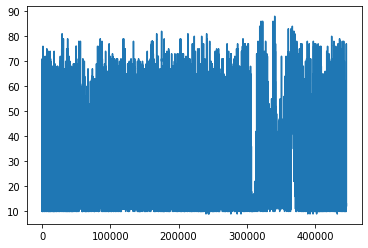

Power


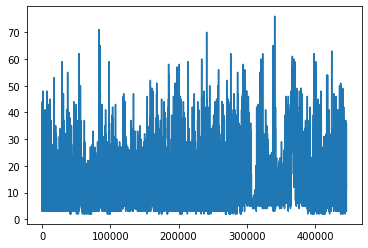

Total_time


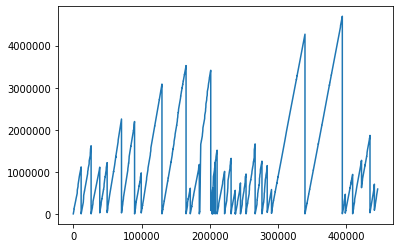

Delta_time


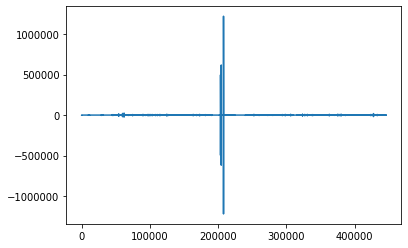

In [8]:
for x in df.columns[:-1]:
    print(x)
    df[x].plot()
    plt.show()

In [9]:
somaqd = lambda x,y: ((x**2)+(y**2))**0.5

acctotal= somaqd(df.F_acc,df.L_acc)

In [10]:
df= df.loc[df['Gear']>0]

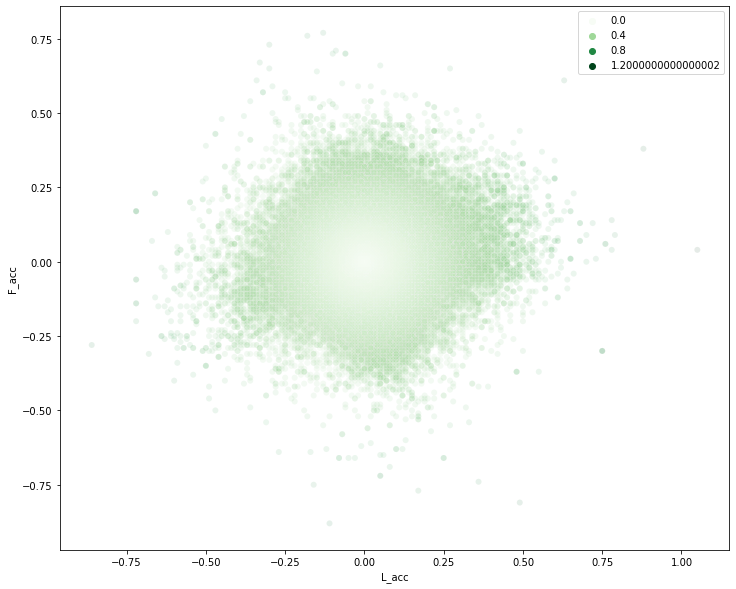

In [11]:
#sns.set_palette("husl")
plt.figure(figsize=(12,10))

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "#e74c3c"]
#sns.xkcd_palette(colors)


sns.scatterplot(data=df, x='L_acc',y='F_acc',alpha=0.1, hue=acctotal, palette='Greens')
plt.show()


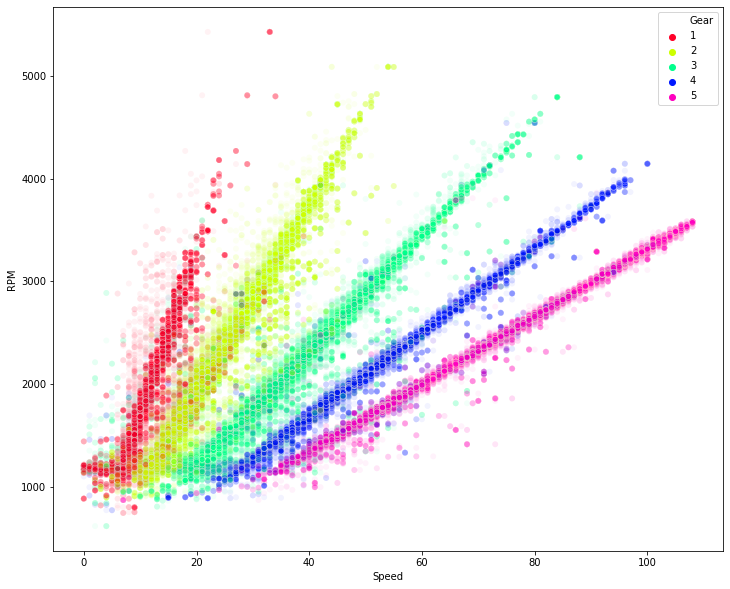

In [12]:
#sns.set_palette("husl")
plt.figure(figsize=(12,10))

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "#e74c3c"]
#sns.xkcd_palette(colors)


sns.scatterplot(data=df, y='RPM',x='Speed',alpha=0.05, hue='Gear', palette='gist_rainbow', legend='full')

plt.show()

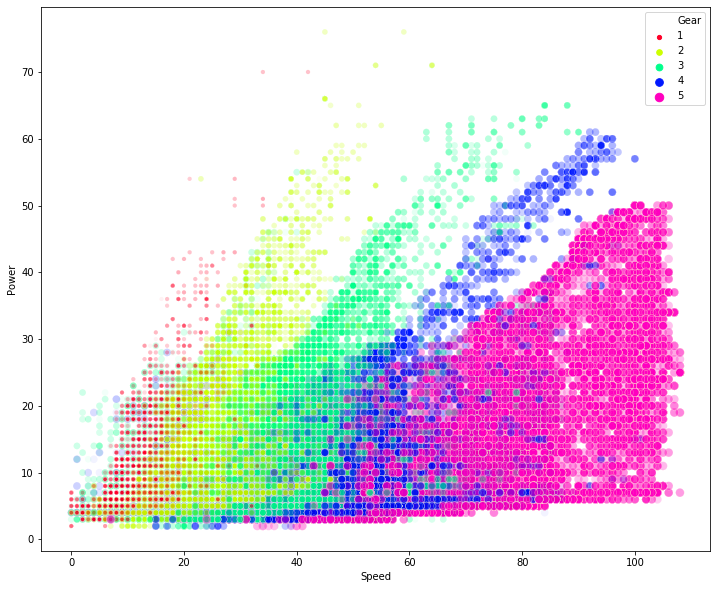

In [13]:
#sns.set_palette("husl")
plt.figure(figsize=(12,10))

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "#e74c3c"]
#sns.xkcd_palette(colors)


sns.scatterplot(data=df, x='Speed',y='Power',alpha=0.05, hue='Gear', palette='gist_rainbow', legend='full', size='Gear')


In [14]:
teste = df.groupby(by=['Speed','Gear'], as_index=False).max()
teste

Speed  Gear  Voltage  Temp_C     RPM  Fuel Flow     MAF   MAF2  \
0      0.0     1     13.0    36.0  1440.0        8.8   2.179   4.58   
1      0.0     2     12.9    23.0  1136.0        7.9   1.388   2.92   
2      0.0     3     13.0    31.0  1202.0        2.0   1.343   2.82   
3      0.0     4     12.8    30.0  1160.0        0.9   1.234   2.59   
4      1.0     1     12.9    36.0  1236.0        7.9   1.635   3.44   
..     ...   ...      ...     ...     ...        ...     ...    ...   
366  104.0     5     13.2    22.0  3514.0       54.9  14.440  30.36   
367  105.0     5     13.2    22.0  3521.0       48.5  14.540  30.57   
368  106.0     5     13.2    22.0  3554.0       51.1  14.540  30.57   
369  107.0     5     13.2    19.0  3586.0       19.5  10.431  21.93   
370  108.0     5     13.1    18.0  3586.0       51.1   7.881  16.57   

     Ignition_TA  L_acc  F_acc  Latitude  Longitude  Altitude  Torque  Power  \
0           32.0   0.05   0.40 -23.61151  -46.52961     802.0    26.0    7.0   
1            9.0   0.15   0.07 -23.71803  -46.55764     767.0    20.0    4.0   
2           15.5   0.17   0.19 -23.60686  -46.53327     810.0    21.0    5.0   
3            9.0   0.02   0.07 -23.63861  -46.53577     764.0    21.0    4.0   
4           24.5   0.13   0.16 -23.42245  -46.48444     779.0    24.0    6.0   
..           ...    ...    ...       ...        ...       ...     ...    ...   
366         42.5   0.22   0.23 -23.42245  -46.48444     785.0    78.0   50.0   
367         42.5   0.15   0.52 -23.42245  -46.48444     765.0    77.0   50.0   
368         33.5   0.20   0.22 -23.42245  -46.48444     765.0    77.0   50.0   
369         32.0   0.11   0.19 -23.70000  -46.50499     751.0    55.0   37.0   
370         33.5   0.15   0.16 -23.70000  -46.50503     748.0    42.0   28.0   

     Total_time  Delta_time      Date  
0       2196083         305  20200504  
1        219048         179  20200306  
2       1105370         218  20190512  
3       1187207         139  20190511  
4       3067071         207  20200307  
..          ...         ...       ...  
366     3494077       10920  20200420  
367     3441434        8575  20200420  
368     3270030         902  20200420  
369     3281010        1581  20200420  
370     3278981         726  20200420  

[371 rows x 19 columns]

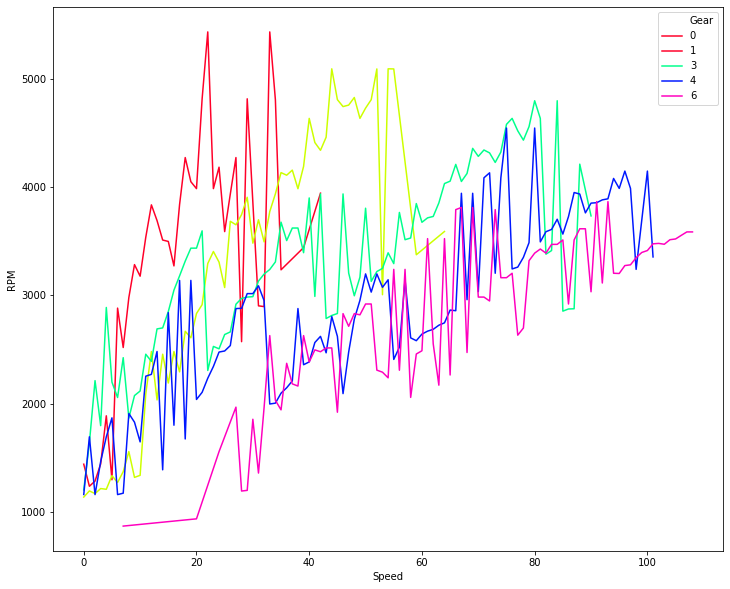

In [15]:
plt.figure(figsize=(12,10))
sns.lineplot(data=teste, x='Speed',y='RPM', hue='Gear', palette='gist_rainbow', legend='brief')

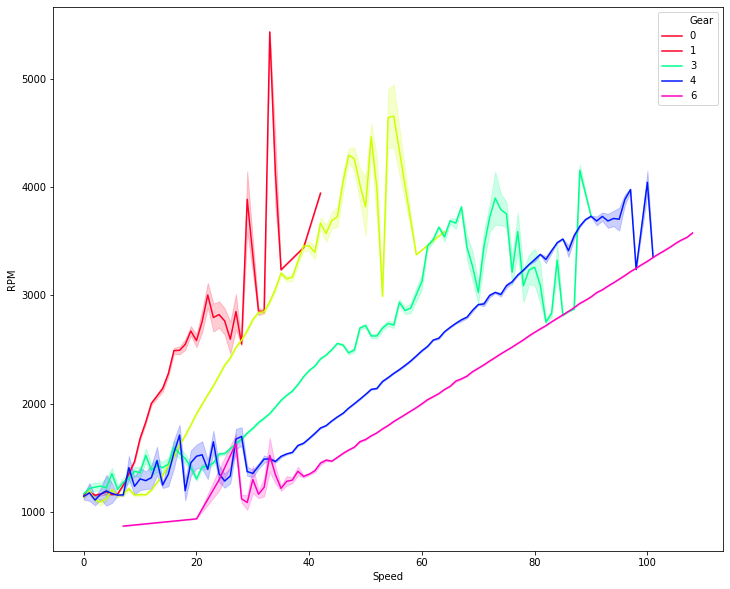

In [16]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df, x='Speed',y='RPM', hue=df['Gear'], palette='gist_rainbow', legend='brief')

In [17]:
area = px.area(data_frame=teste, x='Speed',y='Torque', color='Gear',log_x=False, log_y=False,)
area.show()



fig = go.Figure()
fig.add_trace(go.Scatter(x=teste.Speed, y=teste.Torque, fill='tozeroy',
                    mode='none' # override default markers+lines
                    ))
fig.add_trace(go.Scatter(x=[1, 2, 3, 4], y=[3, 5, 1, 7], fill='tonexty',
                    mode= 'none'))

fig.show()

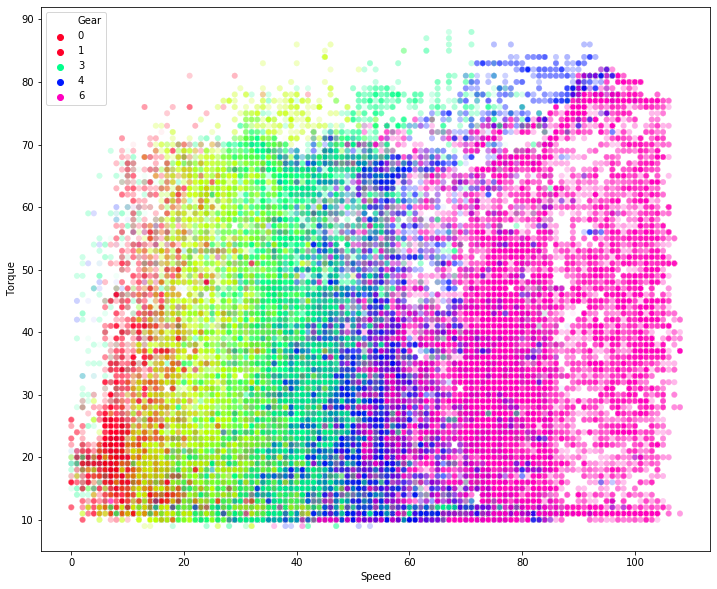

In [18]:
#sns.set_palette("husl")
plt.figure(figsize=(12,10))

#sns.xkcd_palette(colors)


sns.scatterplot(data=df, x='Speed',y='Torque',alpha=0.05, hue='Gear', palette='gist_rainbow', legend='brief')
